In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

le = preprocessing.LabelEncoder()

In [ ]:
#read data
df=pd.read_csv("cars_raw.csv")
df.head(5)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [ ]:
# prints dataset Info
def datasetInfo(dataset):
  print("Shape of dataset:",dataset.shape)
  print("Length of dataset:",len(dataset))
  print(dataset.isnull().sum())
  print("Dataset describe:",dataset.describe())
  print("Dataset info:",dataset.info())
  print("Dataset dtype:",dataset.dtypes)

In [ ]:
#perform one-hot encoding
def fitData(dataset):
  dataset.Drivetrain = dataset.Drivetrain.apply(lambda x: 'AWD' if 'All' in x else ('FWD' if 'Front' in x else (
                                                                          '4WD' if 'Four' in x else(
                                                                          'RWD' if 'Rear' in x else x))))
  drivetrain = sorted(list(dataset['Drivetrain'].unique()))
  dataset['Drivetrain'] = le.fit_transform(dataset['Drivetrain'].values.reshape(int(-1),int(1)).ravel())
  dataset['Price'] = dataset['Price'].str.replace(',', '').str.replace('$', '')
  dataset['Price'] = dataset['Price'].replace('Not Priced',np.NaN)
  dataset = dataset.dropna()
  dataset['Price']= dataset['Price'].astype(int)
  exteriorColor = sorted(list(dataset['ExteriorColor'].unique()))
  dataset.ExteriorColor = dataset.ExteriorColor.apply(lambda x: 'red-orange' if x == '0040' else ('medium-dark-cyan' if x =='39525' else x))
  dataset['ExteriorColor'] = le.fit_transform(dataset['ExteriorColor'].values.reshape(int(-1),int(1)).ravel())
  dataset = dataset.apply(le.fit_transform)
  return dataset

In [ ]:
#Creates Correlation Matrix
def corrMat(dataset):
  corrmat = dataset.corr()
  fig = plt.figure(figsize = (14, 14))
  sns.heatmap(corrmat, vmax= .9, square=True)
  plt.show()

In [ ]:
#Performs randomForestRegressor
def randomForestRegressor(x_train, x_val, y_train, y_val):
  model = RandomForestRegressor()
  model.fit(x,y)
  importance = model.feature_importances_

  for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    pyplot.bar([x for x in range(len(importance))], importance)
  pyplot.show()

In [ ]:
#Performs SVM
def SVM(x_train, x_val, y_train, y_val):
  model = svm.SVC()
  model.fit(x_train, y_train)
  svm_score = model.score(x_val, y_val)
  return svm_score

In [ ]:
#Performs linear regression
def linearReg(x_train, x_val, y_train, y_val):
  model = LinearRegression()
  model.fit(x_train, y_train)
  LinR = model.score(x_val, y_val)
  return LinR

In [ ]:
#Performs XG Boost Gradient Descent
def XGBRegressor(x_train, x_val, y_train, y_val):
  xgbRegressor = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
  xgbRegressor.fit(x_train, y_train)
  print(xgbRegressor)
  y_pred = xgbRegressor.predict(x_val)
  mean_squared_error(y_val, y_pred)
  temp = np.array(y_val)
  correct = 0
  for i in range(len(y_val)):
    print("Actual:", temp[i][0],"Predicted:", y_pred[i])
    temp_pred = round(y_pred[i])
    if temp_pred == temp[i][0]:
      correct += 1
  print(correct/len(y_val) * 100, "%")

In [ ]:
# prints datset info
datasetInfo(df)

Shape of dataset: (9379, 32)
Length of dataset: 9379
Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64
Datase

In [ ]:
# encodes data
fitted_dataset = fitData(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
# display first 5 elements
fitted_dataset.head(5)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,16,37,997,21,2913,17,44,0,874,22,...,33,2,10,14,6,45,136,4454,1198,3355
1,15,11,398,21,3846,19,317,0,1585,37,...,33,0,10,11,6,6,138,1008,909,3827
2,14,32,4,21,3094,18,297,0,1587,35,...,33,0,6,8,6,45,208,595,5977,2774
4,17,22,853,21,3782,19,75,0,2294,37,...,32,2,11,14,6,45,136,2320,3879,3275
5,9,37,46,21,595,18,33,0,385,33,...,358,3,8,10,6,13,171,6005,3016,7485


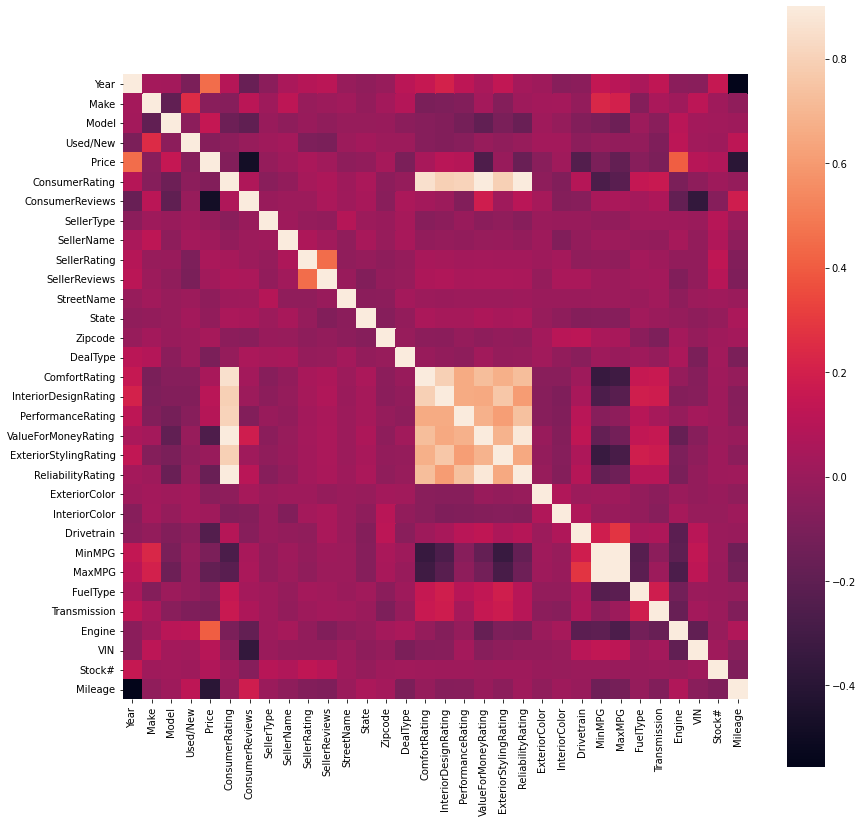

In [ ]:
# creates correlation matrix for fitted_dataset
corrMat(fitted_dataset)

In [ ]:
# splits Consumer Rating from the rest of the datset, then splits the train set and test set
x=fitted_dataset.iloc[:,fitted_dataset.columns != 'ConsumerRating']
y=fitted_dataset.iloc[:,fitted_dataset.columns == 'ConsumerRating']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: 0, Score: 0.00230
Feature: 1, Score: 0.00159
Feature: 2, Score: 0.00212
Feature: 3, Score: 0.00004
Feature: 4, Score: 0.00169
Feature: 5, Score: 0.00403
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00029
Feature: 8, Score: 0.00017
Feature: 9, Score: 0.00020
Feature: 10, Score: 0.00021
Feature: 11, Score: 0.00016
Feature: 12, Score: 0.00026
Feature: 13, Score: 0.00004
Feature: 14, Score: 0.02114
Feature: 15, Score: 0.02610
Feature: 16, Score: 0.12255
Feature: 17, Score: 0.34707
Feature: 18, Score: 0.00758
Feature: 19, Score: 0.45538
Feature: 20, Score: 0.00021
Feature: 21, Score: 0.00018
Feature: 22, Score: 0.00015
Feature: 23, Score: 0.00097
Feature: 24, Score: 0.00112
Feature: 25, Score: 0.00015
Feature: 26, Score: 0.00087
Feature: 27, Score: 0.00094
Feature: 28, Score: 0.00188
Feature: 29, Score: 0.00020
Feature: 30, Score: 0.00038


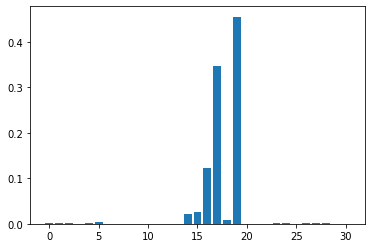

In [ ]:
# performs random Forest regressor on the fitted dataset
randomForestRegressor(x_train, x_val, y_train, y_val)

In [ ]:
#performs SVM
SVM(x_train, x_val, y_train, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.39475600873998545

In [ ]:
# splits the 6 features that affect consumer ratings
x=fitted_dataset[["ComfortRating", "InteriorDesignRating", "PerformanceRating", "ValueForMoneyRating", "ExteriorStylingRating", "ReliabilityRating"]]
y=fitted_dataset[['ConsumerRating']]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: 0, Score: 0.02372
Feature: 1, Score: 0.02962
Feature: 2, Score: 0.11735
Feature: 3, Score: 0.31108
Feature: 4, Score: 0.01030
Feature: 5, Score: 0.50792


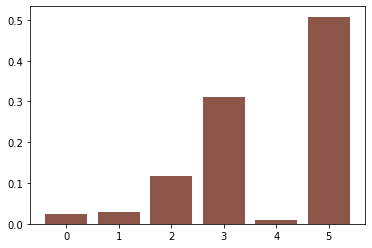

In [ ]:
# trying to use these six features to predict consumer rating
randomForestRegressor(x_train, x_val, y_train, y_val)

In [ ]:
#performs SVM using the 6 features to predict consumer rating
SVM(x_train, x_val, y_train, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8889293517844137

In [ ]:
#performs linear Regression using 6 features to preditc consumer rating
linearReg(x_train, x_val, y_train, y_val)

0.971521645007096

In [ ]:
# testing how interchangable the 6 features and consumer rating are
x=fitted_dataset.iloc[:,fitted_dataset.columns != 'Price']
y=fitted_dataset.iloc[:,fitted_dataset.columns == 'Price']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

In [ ]:
randomForestRegressor(x_train, x_val, y_train, y_val)

In [ ]:
linearReg(x_train, x_val, y_train, y_val)

0.6992249914416873

In [ ]:
#test without the 6 features
x=fitted_dataset[["Year", "Make","Model","Used/New","ConsumerRating","ConsumerReviews",
      "SellerType","SellerName","SellerRating","SellerReviews","StreetName",
      "State","Zipcode","DealType","ExteriorColor","InteriorColor","Drivetrain",
      "MinMPG","MaxMPG","FuelType","Transmission","Engine","VIN","Stock#",
      "Mileage"]]
y=fitted_dataset.iloc[:,fitted_dataset.columns == 'Price']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

In [ ]:
linearReg(x_train, x_val, y_train, y_val)

0.6269941227728733

In [ ]:
# test with the 6 features 
x=fitted_dataset[["Year", "Make","Model","Used/New","ComfortRating", "InteriorDesignRating", "PerformanceRating", "ValueForMoneyRating", "ExteriorStylingRating", "ReliabilityRating","ConsumerReviews",
      "SellerType","SellerName","SellerRating","SellerReviews","StreetName",
      "State","Zipcode","DealType","ExteriorColor","InteriorColor","Drivetrain",
      "MinMPG","MaxMPG","FuelType","Transmission","Engine","VIN","Stock#",
      "Mileage"]]
y=fitted_dataset.iloc[:,fitted_dataset.columns == 'Price']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

In [ ]:
linearReg(x_train, x_val, y_train, y_val)

0.6755074362738944

In [ ]:
# cleaner dataset deleting ConsumerRating
df = df.drop(['ConsumerRating'],axis=1)
df.head()

,Year,Make,Model,Used/New,Price,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,...,Black,2,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,817,Dealer,Giant Chevrolet,4.8,131,...,Black,0,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,495,Dealer,Gill Auto Group Madera,4.6,249,...,Black,0,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,36,Dealer,AutoSavvy Las Vegas,4.6,284,...,–,2,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,76,Dealer,Lexus of Henderson,4.8,4755,...,Birch,2,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
